#Text Generation with BiLSTM model

In [1]:
# Import Necessary python packages and APIs

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [2]:
# load the file
shakespeare_text = open('D://NLP//sonnets.txt').read()
print(len(shakespeare_text))
corpus = shakespeare_text.lower().split("\n")


93578


In [3]:
# set tokenizer
tokenizer = Tokenizer()
# fit
tokenizer.fit_on_texts(corpus)
vocab_size = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(vocab_size)


{'and': 1, 'the': 2, 'to': 3, 'of': 4, 'my': 5, 'i': 6, 'in': 7, 'that': 8, 'thy': 9, 'thou': 10, 'with': 11, 'for': 12, 'is': 13, 'love': 14, 'not': 15, 'but': 16, 'a': 17, 'me': 18, 'thee': 19, 'so': 20, 'be': 21, 'as': 22, 'all': 23, 'you': 24, 'his': 25, 'which': 26, 'when': 27, 'it': 28, 'this': 29, 'by': 30, 'your': 31, 'doth': 32, 'do': 33, 'from': 34, 'on': 35, 'or': 36, 'no': 37, 'then': 38, 'have': 39, 'what': 40, 'are': 41, 'if': 42, 'more': 43, 'mine': 44, 'their': 45, 'shall': 46, 'sweet': 47, 'time': 48, 'will': 49, 'they': 50, 'beauty': 51, 'nor': 52, 'eyes': 53, 'art': 54, 'her': 55, 'heart': 56, 'yet': 57, 'o': 58, 'than': 59, 'can': 60, 'should': 61, 'thine': 62, 'now': 63, 'where': 64, 'make': 65, 'one': 66, 'hath': 67, 'he': 68, 'fair': 69, 'still': 70, 'how': 71, 'eye': 72, 'him': 73, 'like': 74, 'true': 75, 'see': 76, 'am': 77, 'she': 78, 'those': 79, 'though': 80, 'being': 81, 'some': 82, 'every': 83, 'such': 84, 'own': 85, 'were': 86, 'dost': 87, 'who': 88, 'liv

In [4]:
# create sequences and n_gram sequences
input_sequences = []
for line in corpus:
    tokens = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(tokens)):
        n_gram_sequence = tokens[:i+1]
        input_sequences.append(n_gram_sequence)



In [5]:
#padding the sequences
max_seq_len = max([len(i) for i in input_sequences])
input_seq_array = np.array(pad_sequences(input_sequences,
                                         maxlen=max_seq_len,
                                         padding='pre')
                        )


In [6]:

# slicing the features and labels from sequences
features = input_seq_array[:, :-1]
labels = input_seq_array[:, -1]

# Encoding the label sequences
labels = tf.keras.utils.to_categorical(labels)

In [7]:

# sequential model
model = tf.keras.Sequential([
                tf.keras.layers.Embedding(vocab_size, 120, input_length=max_seq_len-1),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10,return_sequences=True)),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
                tf.keras.layers.Dense(vocab_size, activation='softmax')
])

# optimizer with standard learning rate
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
# compile the model with optimizer and loss function
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 120)           385320    
                                                                 
 bidirectional (Bidirectiona  (None, 10, 20)           10480     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               6560      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 3211)              131651    
                                                                 
Total params: 534,011
Trainable params: 534,011
Non-trainable params: 0
_________________________________________________________________


In [8]:
# train the model
history = model.fit(features, labels, epochs=200, verbose=1)

Epoch 1/200
484/484 [==============================] - 20s 25ms/step - loss: 6.8676 - accuracy: 0.0204
Epoch 2/200
484/484 [==============================] - 12s 24ms/step - loss: 6.4579 - accuracy: 0.0288
Epoch 3/200
484/484 [==============================] - 12s 24ms/step - loss: 6.2908 - accuracy: 0.0387
Epoch 4/200
484/484 [==============================] - 12s 25ms/step - loss: 6.0907 - accuracy: 0.0488
Epoch 5/200
484/484 [==============================] - 13s 26ms/step - loss: 5.8818 - accuracy: 0.0581
Epoch 6/200
484/484 [==============================] - 12s 25ms/step - loss: 5.7225 - accuracy: 0.0622
Epoch 7/200
484/484 [==============================] - 13s 26ms/step - loss: 5.5389 - accuracy: 0.0689
Epoch 8/200
484/484 [==============================] - 12s 26ms/step - loss: 5.3667 - accuracy: 0.0772
Epoch 9/200
484/484 [==============================] - 13s 27ms/step - loss: 5.1847 - accuracy: 0.0827
Epoch 10/200
484/484 [==============================] - 13s 27ms/step - l

In [9]:

# function for plotting the accuracy & loss from the model training history
def plot_metric(history, metric):
  plt.plot(history.history[metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()


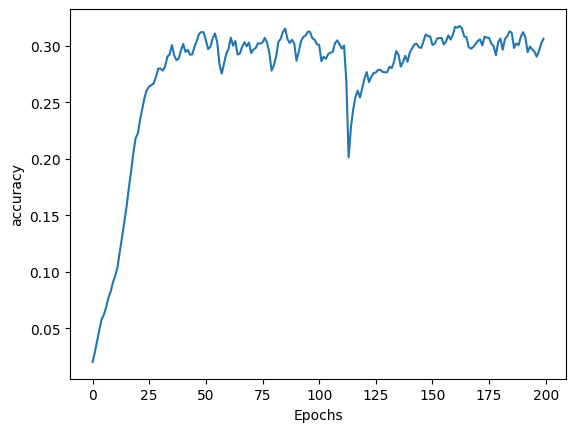

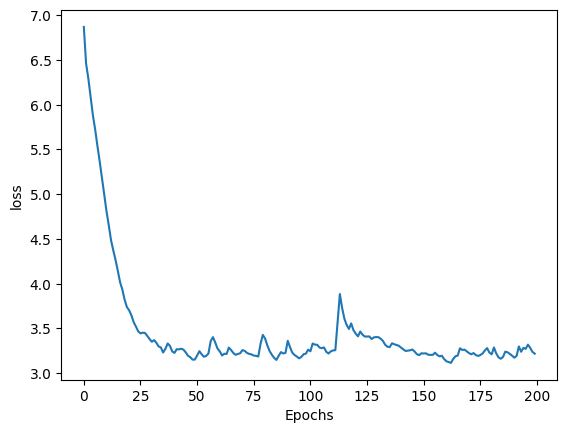

In [10]:
plot_metric(history, 'accuracy')
plot_metric(history, 'loss')

In [12]:

seed_text = "It was a wonderful day."
next_words = 50

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_len - 1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    pred = np.argmax(predicted, axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == pred:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

It was a wonderful day. to win his lays esteem faith ' prove words fair rare will me against it past past it ' bring she lies live it ' 'will' prove thee it prove live ' thee prove she speak care ' prove 'will treasure ' 'will ' ' lays me so skill so
